## Practica#5: Modelos Lineales y Correlacion

### Regresión Lineal
La regresión lineal es una técnica estadística para modelar la relación entre una variable dependiente (𝑦) y una o más variables independientes ( 𝑥1 , 𝑥2 , … , xn).

#### Tipos de Regresión Lineal
**Regresión Lineal Simple:** Modela la relación entre una variable dependiente 𝑦 y una independiente 𝑥 :

    𝑦 = 𝛽0 + 𝛽1𝑥 + 𝜖

Donde:

    𝛽0 : Intercepto.
    𝛽1: Pendiente (coeficiente de regresión).

    ϵ: Error aleatorio.

**Regresión Lineal Múltiple:** Extiende el modelo para incluir varias variables independientes:

    𝑦 = 𝛽0 + 𝛽1𝑥1 + 𝛽2𝑥2 + ⋯ + 𝛽𝑛𝑥𝑛 + 𝜖

Interpretación de los Coeficientes:

    Intercepto (𝛽0): Valor esperado de 𝑦 cuando 𝑥=0.

    Pendiente (𝛽1): Cambio esperado en 𝑦 por cada unidad de cambio en 𝑥, manteniendo las otras variables constantes.

#### Evaluación del Modelo

**𝑅^2 (Coeficiente de Determinación):**
    
    Mide la proporción de la variación en 𝑦 explicada por el modelo.

Rango: 

    ( 0 ≤ 𝑅^2 ≤ 1 )

**p-valor de los coeficientes:**

Determina si una variable independiente tiene un impacto significativo en 𝑦.

#### Coeficientes de correlacion

La correlación mide la fuerza y dirección de la relación lineal entre dos variables. Los métodos más comunes son:

**Coeficiente de Pearson**
    
    Fórmula:

        𝑟=∑(𝑥𝑖−𝑥ˉ)(𝑦𝑖−𝑦ˉ) ENTRE RAIZ DE ( ∑(𝑥𝑖−𝑥ˉ)^2  ⋅ ∑(𝑦𝑖−𝑦ˉ)^2 )

Donde:

    𝑟: Valor entre −1 y 1.
    𝑟>0: Relación positiva.
    𝑟<0: Relación negativa.
    𝑟=0: Sin relación lineal.

**Suposiciones:**
    
    Relación lineal entre las variables.
    Las variables son continuas y normalmente distribuidas.

In [14]:
#importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
df = pd.read_csv(r'C:\Users\Acer\Desktop\trabajos facu\7mo semestre\AYDR_Tareas_MineriaDeDatos\csv\steam_limpio.csv'
, encoding='latin-1')      #recordar poner la direccion del csv steam_limpio csv

=== MATRIZ DE CORRELACIÓN ===
                     appid   english  positive_ratings  negative_ratings  \
appid             1.000000 -0.116878         -0.070888         -0.052198   
english          -0.116878  1.000000          0.006001          0.005705   
positive_ratings -0.070888  0.006001          1.000000          0.762804   
negative_ratings -0.052198  0.005705          0.762804          1.000000   
average_playtime -0.070236  0.000338          0.157898          0.161140   
median_playtime  -0.048308 -0.003416          0.035776          0.047887   
price            -0.152112  0.007716          0.036110          0.051259   

                  average_playtime  median_playtime     price  
appid                    -0.070236        -0.048308 -0.152112  
english                   0.000338        -0.003416  0.007716  
positive_ratings          0.157898         0.035776  0.036110  
negative_ratings          0.161140         0.047887  0.051259  
average_playtime          1.000000       

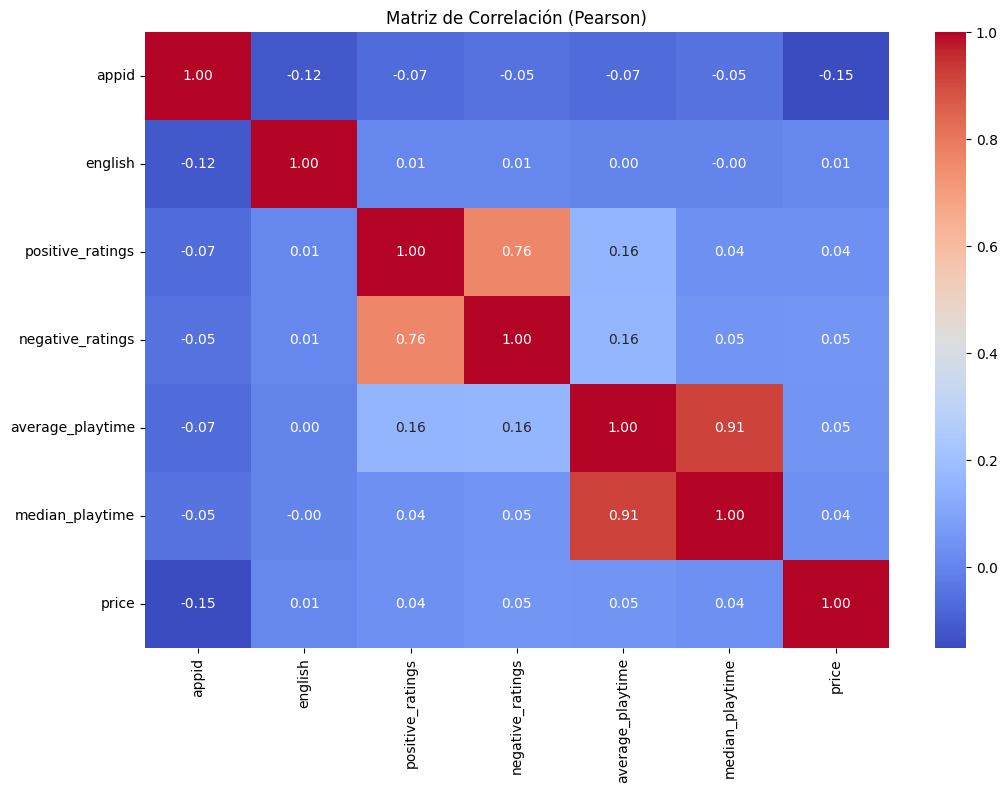

In [16]:
# Seleccionar solo las columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_columns.corr(method='pearson')

print("=== MATRIZ DE CORRELACIÓN ===")
print(correlation_matrix)

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación (Pearson)")
plt.show()

In [17]:
# Variables independientes (X) y dependientes (y)
X = df[['price']]  # Precio como variable independiente
y = df['positive_ratings']  # Calificaciones positivas como dependiente

In [18]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# ---------------------------------
# Resultados del Modelo
# ---------------------------------
intercept = model.intercept_
coef = model.coef_[0]
r2_train = model.score(X_train, y_train)  # R^2 en entrenamiento
r2_test = r2_score(y_test, y_pred)  # R^2 en prueba

print("=== MODELO LINEAL ===")
print(f"Intercepto (β0): {intercept:.4f}")
print(f"Pendiente (β1): {coef:.4f}")
print(f"R^2 (Entrenamiento): {r2_train:.4f}")
print(f"R^2 (Prueba): {r2_test:.4f}")


=== MODELO LINEAL ===
Intercepto (β0): 405.1606
Pendiente (β1): 79.4235
R^2 (Entrenamiento): 0.0012
R^2 (Prueba): 0.0017


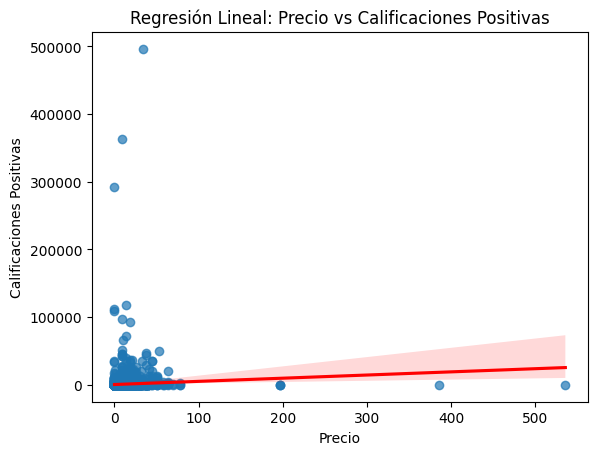

In [19]:
# Gráfico de regresión para los datos de prueba
sns.regplot(x=X_test['price'], y=y_test, line_kws={"color": "red"}, scatter_kws={"alpha": 0.7})
plt.title("Regresión Lineal: Precio vs Calificaciones Positivas")
plt.xlabel("Precio")
plt.ylabel("Calificaciones Positivas")
plt.show()

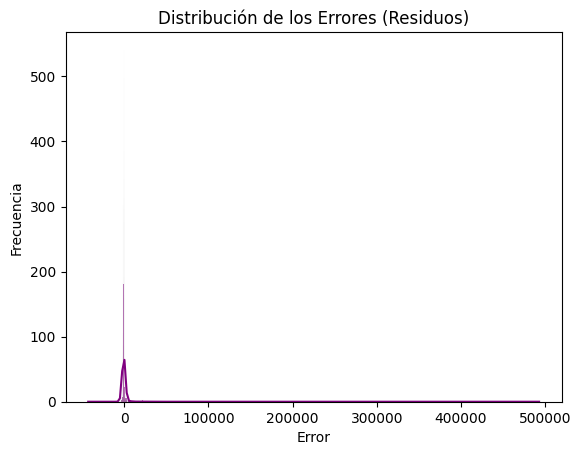

In [20]:
# Histograma de errores
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribución de los Errores (Residuos)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

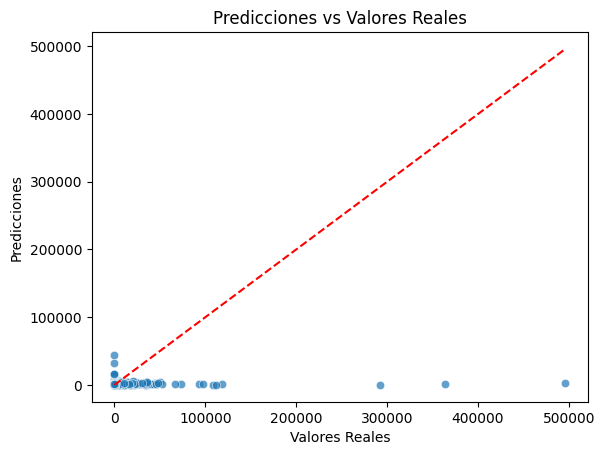

In [13]:
# Diagrama de dispersión para predicciones vs valores reales
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicciones vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()

In [21]:
from scipy.stats import pearsonr, spearmanr

=== REGRESIÓN LINEAL ===
Intercepto (β0): 471.3261
Pendiente (β1): 68.5596
R^2: 0.0013


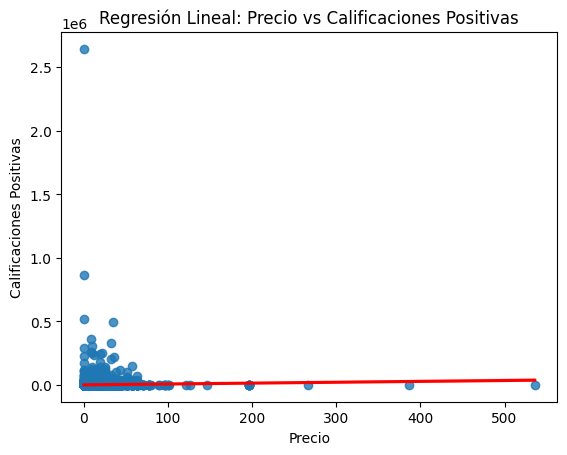

In [22]:
# Variables para el análisis
x = df['price'].values.reshape(-1, 1)
y = df['positive_ratings'].values

# ---------------------------------
# 1. Regresión Lineal
# ---------------------------------
# Crear el modelo
model = LinearRegression()
model.fit(x, y)

# Obtener coeficientes
intercept = model.intercept_
slope = model.coef_[0]

# Predicciones
y_pred = model.predict(x)

print("=== REGRESIÓN LINEAL ===")
print(f"Intercepto (β0): {intercept:.4f}")
print(f"Pendiente (β1): {slope:.4f}")
print(f"R^2: {model.score(x, y):.4f}")

# Visualización
sns.regplot(x='price', y='positive_ratings', data=df, line_kws={'color': 'red'})
plt.title("Regresión Lineal: Precio vs Calificaciones Positivas")
plt.xlabel("Precio")
plt.ylabel("Calificaciones Positivas")
plt.show()


In [23]:
# ---------------------------------
# 2. Correlación de Pearson
# ---------------------------------
pearson_corr, pearson_p = pearsonr(df['price'], df['positive_ratings'])
print("\n=== CORRELACIÓN DE PEARSON ===")
print(f"Coeficiente de Pearson (r): {pearson_corr:.4f}, p-valor: {pearson_p:.4f}")

if pearson_p < 0.05:
    print("Se rechaza H0: Existe una correlación significativa.")
else:
    print("No se rechaza H0: No hay evidencia de correlación significativa.")


=== CORRELACIÓN DE PEARSON ===
Coeficiente de Pearson (r): 0.0361, p-valor: 0.0000
Se rechaza H0: Existe una correlación significativa.


In [25]:
# ---------------------------------
# 3. Correlación de Spearman
# ---------------------------------
spearman_corr, spearman_p = spearmanr(df['price'], df['positive_ratings'])
print("\n=== CORRELACIÓN DE SPEARMAN ===")
print(f"Coeficiente de Spearman (rs): {spearman_corr:.4f}, p-valor: {spearman_p:.4f}")

if spearman_p < 0.05:
    print("Se rechaza H0: Existe una correlación significativa.")
else:
    print("No se rechaza H0: No hay evidencia de correlación significativa.")


=== CORRELACIÓN DE SPEARMAN ===
Coeficiente de Spearman (rs): 0.2050, p-valor: 0.0000
Se rechaza H0: Existe una correlación significativa.


### Modelo de regresion multiple
Con este modelo medire la buena recepcion de los juegos, en base a su precio,promedio de tiempo de juego y reseñas negativas

=== MODELO LINEAL MÚLTIPLE ===
Intercepto (β0): 203.0978
Coeficientes (β):
  price: -45.5701
  average_playtime: 0.1684
  negative_ratings: 5.6745

R^2 (Entrenamiento): 0.8686
R^2 (Prueba): -8.5109
MSE (Prueba): 1015847071.3038


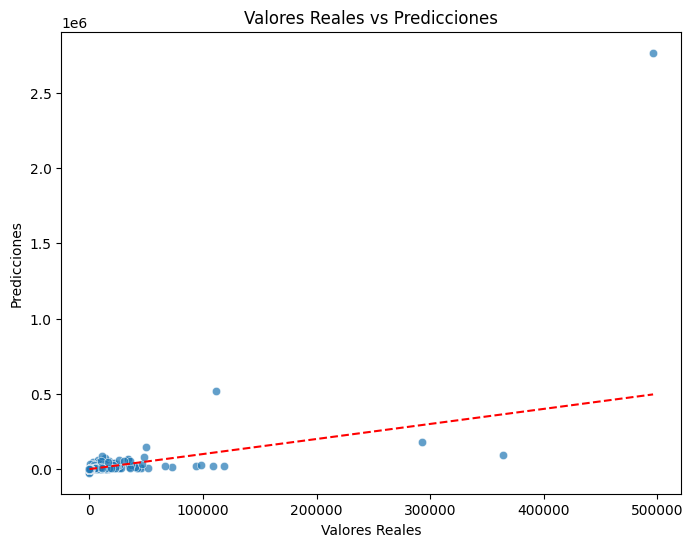

In [21]:
# Seleccionar las variables para el modelo
variables_independientes = ['price', 'average_playtime', 'negative_ratings']
variable_dependiente = 'positive_ratings'

# Filtrar datos no nulos
df = df.dropna(subset=variables_independientes + [variable_dependiente])

# Dividir las variables independientes y dependientes
X = df[variables_independientes]
y = df[variable_dependiente]

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# ---------------------------------
# Resultados del Modelo
# ---------------------------------
# Coeficientes y métricas
intercept = model.intercept_
coefficients = model.coef_
r2_train = model.score(X_train, y_train)
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

print("=== MODELO LINEAL MÚLTIPLE ===")
print(f"Intercepto (β0): {intercept:.4f}")
print("Coeficientes (β):")
for var, coef in zip(variables_independientes, coefficients):
    print(f"  {var}: {coef:.4f}")
print(f"\nR^2 (Entrenamiento): {r2_train:.4f}")
print(f"R^2 (Prueba): {r2_test:.4f}")
print(f"MSE (Prueba): {mse_test:.4f}")

# ---------------------------------
# Visualización
# ---------------------------------

# Comparación entre predicciones y valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Valores Reales vs Predicciones")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()

=== MATRIZ DE CORRELACIÓN DEL MODELO ===
                     price  average_playtime  negative_ratings  \
price             1.000000          0.049242          0.051259   
average_playtime  0.049242          1.000000          0.161140   
negative_ratings  0.051259          0.161140          1.000000   
positive_ratings  0.036110          0.157898          0.762804   

                  positive_ratings  
price                     0.036110  
average_playtime          0.157898  
negative_ratings          0.762804  
positive_ratings          1.000000  


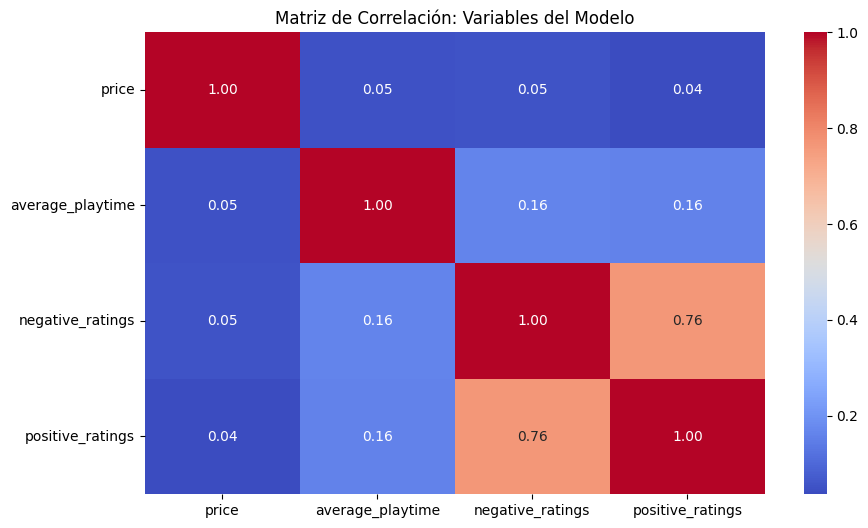

In [26]:
# Crear un DataFrame con las variables seleccionadas
selected_columns = variables_independientes + [variable_dependiente]
df_selected = df[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = df_selected.corr(method='pearson')

print("=== MATRIZ DE CORRELACIÓN DEL MODELO ===")
print(correlation_matrix)

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación: Variables del Modelo")
plt.show()
